In [1]:
from src.project_utils import *
import src.segmentation_functions as sf
from src.background_classification import *
from src.classification import *
from src.region_growing import *
import pandas as pd
import matplotlib.pyplot as plt

test_path_ref = 'C:/Users/miski/Desktop/Neuro-X/MA2/IAPR_50/iapr_group_50/project/dataset_project_iapr2025/train'
test_images, test_images_ref = load_images(test_path_ref)

df = pd.read_csv('C:/Users/miski/Desktop/Neuro-X/MA2/IAPR_50/iapr_group_50/project/final_format/sample_submission.csv')


In [2]:
features = load_features_from_list(test_images)
labels, centers = cluster_images(features, n_clusters=6)

In [3]:
clustered_images = [[] for _ in range(6)]
clustered_ref = [[] for _ in range(6)]
for image, image_ref, label in zip(test_images, test_images_ref, labels):
    clustered_images[label].append(image)
    clustered_ref[label].append(image_ref)

Triangolo
Straciatella
Jelly White
Noblesse
Jelly White
Straciatella


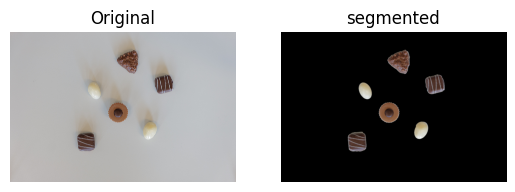

Jelly Milk
Jelly Milk
Jelly White
Jelly Black
Jelly Black
Jelly Black
Jelly White
Jelly Milk


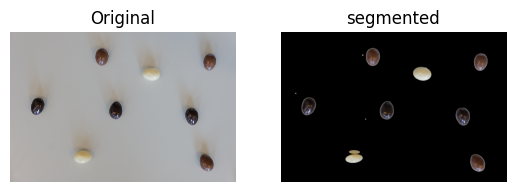

Passion au lait
Triangolo
Triangolo
Triangolo
Passion au lait


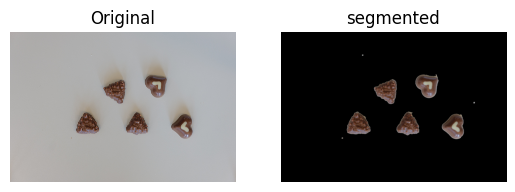

Straciatella
Comtesse
Straciatella
Noblesse


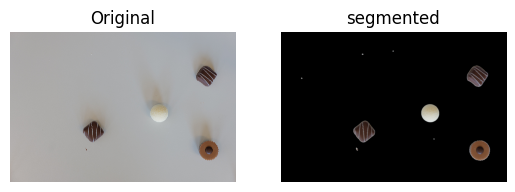

Jelly White
Jelly White
Jelly White
Jelly Black
Jelly Milk
Jelly Milk


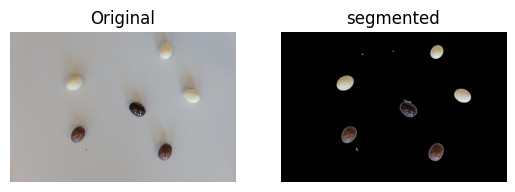

Straciatella
Amandina
Crème Brulée
Jelly Milk
Arabia
Jelly Black


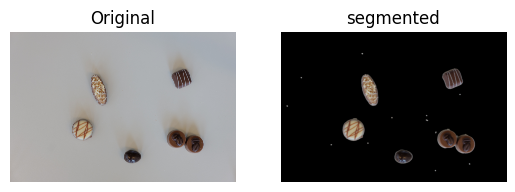

Crème Brulée
Straciatella
Noblesse
Tentation noir
Jelly Milk
Jelly White
Passion au lait
Jelly White
Arabia
Arabia
Amandina
Triangolo
Jelly Milk


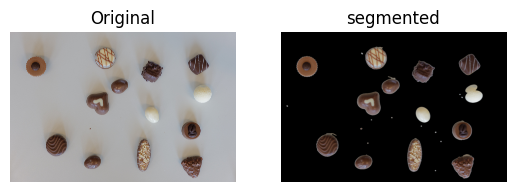

Straciatella
Amandina
Noir authentique
Jelly White


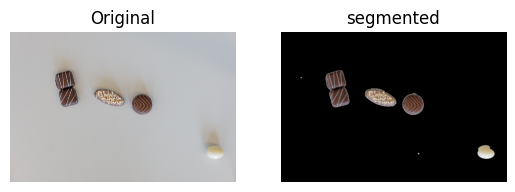

Jelly White
Jelly Milk
Jelly Milk
Jelly White
Jelly Black
Jelly Black
Jelly Black


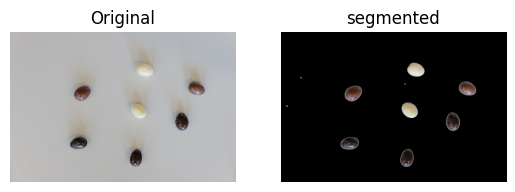

Noblesse
Straciatella
Noir authentique
Arabia


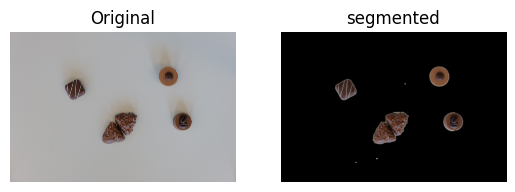

Noir authentique
Noblesse
Noblesse
Noir authentique
Noir authentique


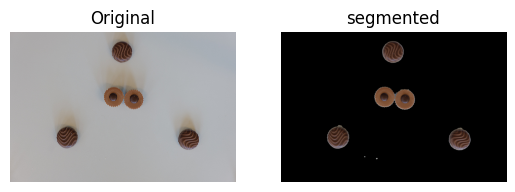

Crème Brulée
Tentation noir
Jelly Milk
Arabia
Arabia
Straciatella


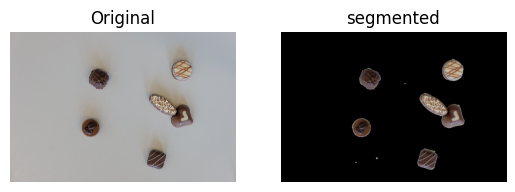

Crème Brulée
Noir authentique
Amandina
Noblesse
Arabia
Noblesse


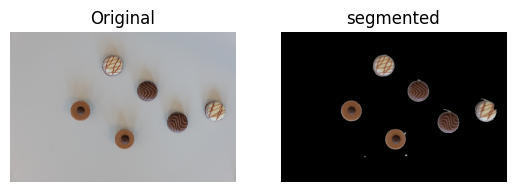

Noblesse
Jelly Milk
Noblesse
Jelly Milk
Arabia
Jelly Black
Jelly Milk
Ignored: Color too close to black boxes or magnets


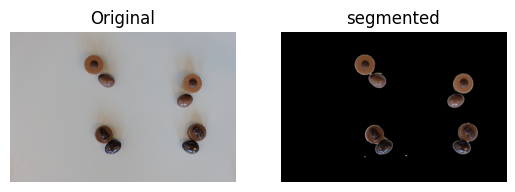

Passion au lait
Comtesse
Noir authentique


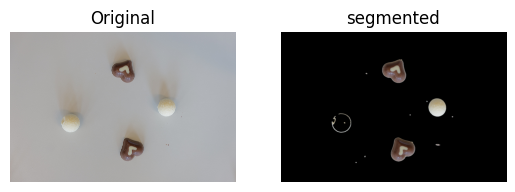

Triangolo
Crème Brulée
Noir authentique
Arabia
Ignored: Color too close to black boxes or magnets
Triangolo


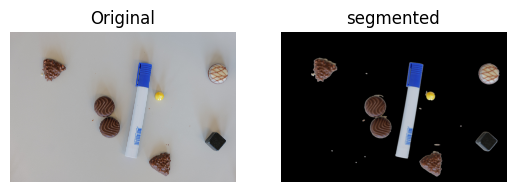

Jelly White
Ignored: Color too close to black boxes or magnets
Arabia
Jelly Black
Ignored: Color too close to black boxes or magnets
Triangolo
Arabia
Amandina
Jelly Black
Ignored: Color too close to black boxes or magnets


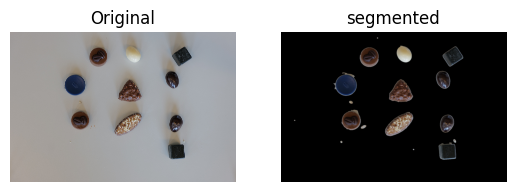

Arabia
Tentation noir


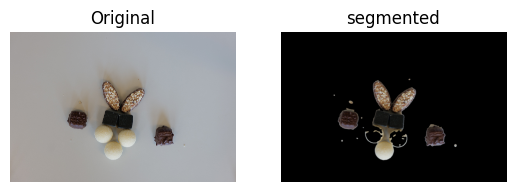

Ignored: Color too close to black boxes or magnets
Amandina
Jelly Black
Ignored: Color too close to black boxes or magnets
Ignored: Color too close to black boxes or magnets
Jelly White
Amandina
Amandina
Ignored: Color too close to black boxes or magnets
Passion au lait


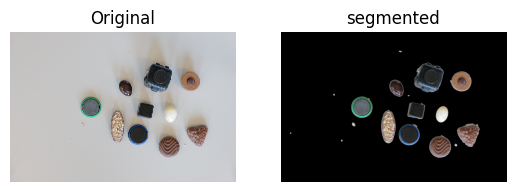

Ignored: Color too close to black boxes or magnets
Straciatella
Tentation noir
Tentation noir
Ignored: Color too close to black boxes or magnets
Triangolo
Triangolo
Tentation noir
Triangolo
Ignored: Color too close to black boxes or magnets
Jelly Black
Tentation noir


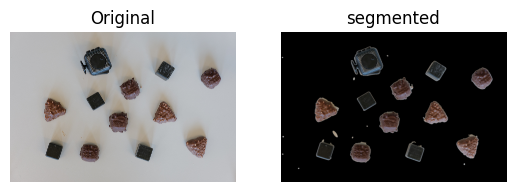

Ignored: Color too close to black boxes or magnets
Noblesse
Noir authentique
Ignored: Color too close to black boxes or magnets
Crème Brulée
Ignored: Color too close to black boxes or magnets
Tentation noir


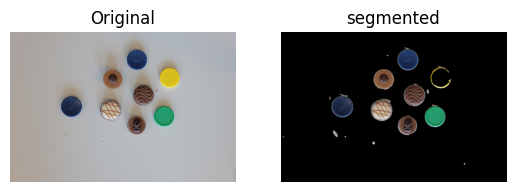

Passion au lait
Arabia
Straciatella
Jelly Black
Ignored: Color too close to black boxes or magnets
Tentation noir
Passion au lait
Jelly Black
Straciatella


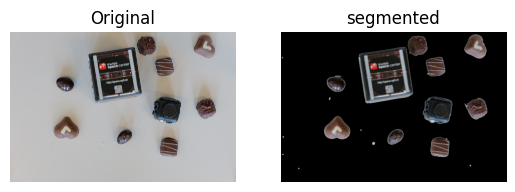

In [4]:
label = 2
for i,image in enumerate(clustered_images[label]):
    if label == 0:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
    elif label == 1:
        segmented_image = sf.segmentation_clean_background(image)
    elif label == 2:
        segmented_image = sf.segmentation_clean_background(image) #sf.segmentation_weighted(image, [1,1,0])
    elif label == 3:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
        region_growing(segmented_image)
    elif label == 4:
        segmented_image = sf.segmentation_background_stylo(image)
    elif label == 5:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
    

    image_ref = int(clustered_ref[label][i])
    row = classification(segmented_image, image)
    row = np.insert(row,0,image_ref)
    df.loc[df.id == image_ref,:] = row
    show_comparison(image,segmented_image)

df.set_index('id').to_csv('submission_final.csv')
